# SPRINT 9 T01: ANÀLISIS DE SENTIMENT I TEXTOS

Descripció

Exercicis d'anàlisi de sentiment i textos.

## EXERCICI 1
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


In [1]:
# Després d'instal·lar el paquet necessari, el cridem juntament amb altres llibreries (no vol dir que les fem servir totes)

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk

In [2]:
#Importo un llibre en anglès d'una pàgina que permet llegir-los en format txt

from urllib import request
text = "https://www.gutenberg.org/files/68894/68894-0.txt"
response = request.urlopen(text)
rawText = response.read().decode('utf8')
print(type(rawText))
print(len(rawText))
print(rawText[:75])

<class 'str'>
480429
﻿The Project Gutenberg eBook of Twenty tales by twenty women, by
Anonymous


El tipus ens diu que l'arxiu és de tipus str, la longitud és de 480.429 caràcters i imprimim els primers 75. A partir d'ara treballarem amb l'arxiu rawText ja que és el més "nu" possible i que ens permetrà treure'n informació

In [3]:
# Tranquem el text en frases utilitzant tokenization
from nltk.tokenize import sent_tokenize
tokenFrase = sent_tokenize(rawText)
print(type(tokenFrase))
print(len(tokenFrase))
print(tokenFrase[:5])

<class 'list'>
3693
['\ufeffThe Project Gutenberg eBook of Twenty tales by twenty women, by\r\nAnonymous\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever.', 'You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org.', 'If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.', 'Title: Twenty tales by twenty women\r\n       From real life in Chicago\r\n\r\nAuthor: Anonymous\r\n\r\nRelease Date: September 1, 2022 [eBook #68894]\r\n\r\nLanguage: English\r\n\r\nProduced by: MFR and the Online Distributed Proofreading Team at\r\n             https://www.pgdp.net (This file was produced from images\r\n             generously made available by The Internet Archive)\r\n\r\n*** START OF THE PROJEC

In [4]:
# Tranquem el text en paraules utilitzant tokenization
from nltk.tokenize import word_tokenize
tokenParaules = word_tokenize(rawText)
print(type(tokenParaules))
print(len(tokenParaules))
print(tokenParaules[:20])

<class 'list'>
103523
['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Twenty', 'tales', 'by', 'twenty', 'women', ',', 'by', 'Anonymous', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of']


In [5]:
# Calculo la freqüència amb la que surten les paraules
from nltk.probability import FreqDist
frequencia = FreqDist(tokenParaules)
print(frequencia)


<FreqDist with 8877 samples and 103523 outcomes>


In [6]:
# Calculo les que es repeteixen més i quantes vegades
frequencia.most_common(10)

[(',', 5726),
 ('the', 3935),
 ('I', 3611),
 ('.', 3488),
 ('to', 2906),
 ('and', 2715),
 ('of', 2266),
 ('a', 1817),
 ('was', 1672),
 ('“', 1351)]

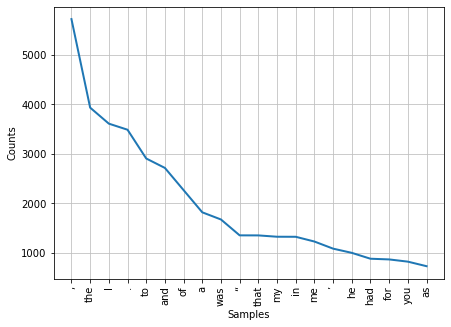

In [7]:
# Faig el gràfic
plt.figure(figsize=(7,5))
frequencia.plot(20,cumulative=False)
plt.show()



## EXERCICI 2
Treu les stopwords i realitza stemming al teu conjunt de dades.


In [8]:
# Imprimeixo els stopwords, o paraules que no tenen molta importància dins un text i que no ens són tant rellevants
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{"you'll", 'have', 'aren', "she's", 'had', 'against', 'her', 'how', 'other', 'ain', "shouldn't", 'my', 'between', 'own', 're', 'what', 'before', 'any', 'by', 'their', "hadn't", 'in', 'has', 'i', 'only', 'does', 'out', "aren't", 'didn', "mightn't", 'your', 'for', 'hasn', "didn't", 'him', 've', "hasn't", 'who', 'can', 'so', "wasn't", 'why', 'mightn', 'll', 'himself', "doesn't", "should've", 'where', 'haven', 'isn', 'once', 'doesn', 'themselves', 'should', 'theirs', 'itself', 'these', "needn't", 'weren', 'a', 'they', 'am', 'but', 'being', 'do', 'is', 'this', 'over', 'just', 'yourself', "mustn't", 'ma', 'up', 'further', 'not', 'if', 'o', 'been', 'couldn', 'no', 'or', 'which', 'nor', 'are', 'of', 'during', 'was', 'while', 'off', 'we', 'each', 'mustn', "it's", 'through', "don't", 'doing', 'all', 'he', 'down', 's', 'from', 'hadn', 'them', 'below', 't', 'with', 'shouldn', 'its', 'both', 'hers', 'needn', 'his', 'ourselves', "that'll", 'about', 'here', "you'd", 'ours', "isn't", 'did', 'yours', '

In [9]:
# Elimino els stopwords del meu text
textFiltrat=[]
for w in tokenParaules:
    if w not in stop_words:
        textFiltrat.append(w)
print ("Text amb stopwords:", tokenParaules[:200])
print("_______________________________________")
print("Text sense stopwords:",textFiltrat[:200])

Text amb stopwords: ['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Twenty', 'tales', 'by', 'twenty', 'women', ',', 'by', 'Anonymous', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', '.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States', ',', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook', '.', 'Title', ':', 'Twenty', 'tales', 'by', 'twenty', 'women', 'From', 'real', 'life', 'in', 'Chicago', 'Author', ':', 'Anonymous', 'Release', 'Date', ':',

In [10]:
# Per veure més la diferènica, imprimeixo el tamany dels dos textos per veure si ha canviat molt o no
print("Text sense filtrar =", len(tokenParaules), "paraules")
print("Text filtrat =", len(textFiltrat), "paraules")

Text sense filtrar = 103523 paraules
Text filtrat = 60542 paraules


In [11]:
# Ara realitzaré stemming, que bàsicament vol dir reduir les paraules a la seva arrel primària
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

textStemming=[]
for w in textFiltrat:
    textStemming.append(ps.stem(w))

print("Text sense stemming:",textFiltrat[:200])
print("_______________________________________")
print("Text amb stemming:",textStemming[:200])

Text sense stemming: ['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'Twenty', 'tales', 'twenty', 'women', ',', 'Anonymous', 'This', 'eBook', 'use', 'anyone', 'anywhere', 'United', 'States', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', ',', 'give', 'away', 're-use', 'terms', 'Project', 'Gutenberg', 'License', 'included', 'eBook', 'online', 'www.gutenberg.org', '.', 'If', 'located', 'United', 'States', ',', 'check', 'laws', 'country', 'located', 'using', 'eBook', '.', 'Title', ':', 'Twenty', 'tales', 'twenty', 'women', 'From', 'real', 'life', 'Chicago', 'Author', ':', 'Anonymous', 'Release', 'Date', ':', 'September', '1', ',', '2022', '[', 'eBook', '#', '68894', ']', 'Language', ':', 'English', 'Produced', ':', 'MFR', 'Online', 'Distributed', 'Proofreading', 'Team', 'https', ':', '//www.pgdp.net', '(', 'This', 'file', 'produced', 'images', 'generously', 'made', 'available', 'The', 'Internet', 'Archive', ')', '*', '*', '*', 'START', 'OF', 'T

In [12]:
# Per veure més la diferènica, imprimeixo el tamany dels dos textos per veure si ha canviat molt o no
print("Text sense stemming =", len(textFiltrat), "paraules")
print("Text amb stemming =", len(textStemming), "paraules")

Text sense stemming = 60542 paraules
Text amb stemming = 60542 paraules


Veiem que hem aconseguit un text amb paraules principals, totes en minúscula i amb el format més bàsic (en aquest cas no hi ha hagut canvis). Un text que és molt més fàcil per treballar-lo i comparar-lo.
Per últim, tornaré a fer el gràfic de quines són les paraules amb més freqüència per veure si han canviat o no

In [13]:
frequenciaStemming = FreqDist(textStemming)
print(frequenciaStemming)

<FreqDist with 5874 samples and 60542 outcomes>


In [14]:
frequenciaStemming.most_common(10)

[(',', 5726),
 ('i', 3611),
 ('.', 3488),
 ('“', 1351),
 ('’', 1082),
 (';', 631),
 ('‘', 525),
 ('”', 497),
 ('one', 387),
 ('would', 384)]

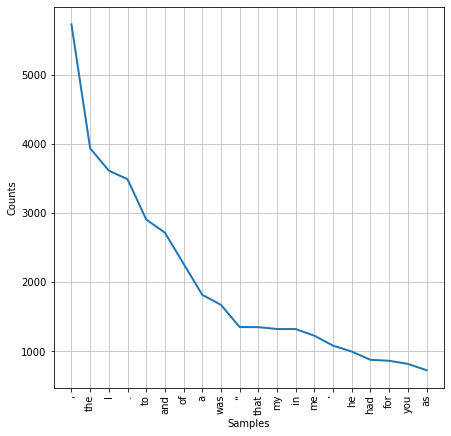

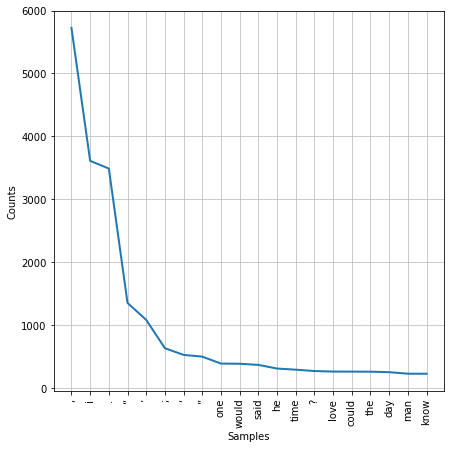

In [15]:
# Faig el gràfic
plt.figure(figsize=(7,7))
frequencia.plot(20,cumulative=False)
plt.figure(figsize=(7,7))
frequenciaStemming.plot(20, cumulative=False)
plt.show()



## EXERCICI 3
Realitza sentiment analysis al teu conjunt de dades.

In [19]:
# Instal·lo les llibreries necessàries
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

In [20]:
#Creo l'analitzador de sentiments
analitzador = SentimentIntensityAnalyzer()

In [22]:
#Aplico l'anàlisis a cada una de les frases que hem fet abans amb el tokenitzador per frases
for sentence in tokenFrase:
    print(sentence)
    scores = analitzador.polarity_scores(sentence)
    for key in scores:
        print(key, ': ', scores[key])
        print()
        

﻿The Project Gutenberg eBook of Twenty tales by twenty women, by
Anonymous

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.
neg :  0.097

neu :  0.841

pos :  0.062

compound :  -0.1531

You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.
neg :  0.0

neu :  1.0

pos :  0.0

compound :  0.0

If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.
neg :  0.0

neu :  0.903

pos :  0.097

compound :  0.4215

Title: Twenty tales by twenty women
       From real life in Chicago

Author: Anonymous

Release Date: September 1, 2022 [eBook #68894]

Language: English

Produced by: MFR and the Online Distributed Proofreading Team at
             https://www.pgdp.net (This file was produced from images
             g

limit_output extension: Maximum message size of 10000 exceeded with 25306 characters

Per cada frase obtenim 3 puntuacions diferents:
- neg (negatiu): valor entre 0 i 1 que ens indica la negativitat de la frase
- neu (neutral): valor entre 0 i 1 que ens indica la neutralitat de la frase
- pos (positiu): valor entre 0 i 1 que ens indica la positivitat de la frase

compound:valor de -1 a 1 que ens indica la positivitat o negativitat de la frase, com més a prop de -1 més negatiu, a prop de 0 indica neutralitat, a prop de 1 indica positivisme.
